In [ ]:
!pip install ultralytics

In [2]:
import os

from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ROOT_DIR = '/content/gdrive/MyDrive/data'

In [9]:
model_path = os.path.join(ROOT_DIR, 'results_on_100_epochs', 'runs', 'detect', 'train', 'weights', 'best.pt')

In [10]:
model = YOLO(model_path)

In [11]:
import cv2
from google.colab.patches import cv2_imshow

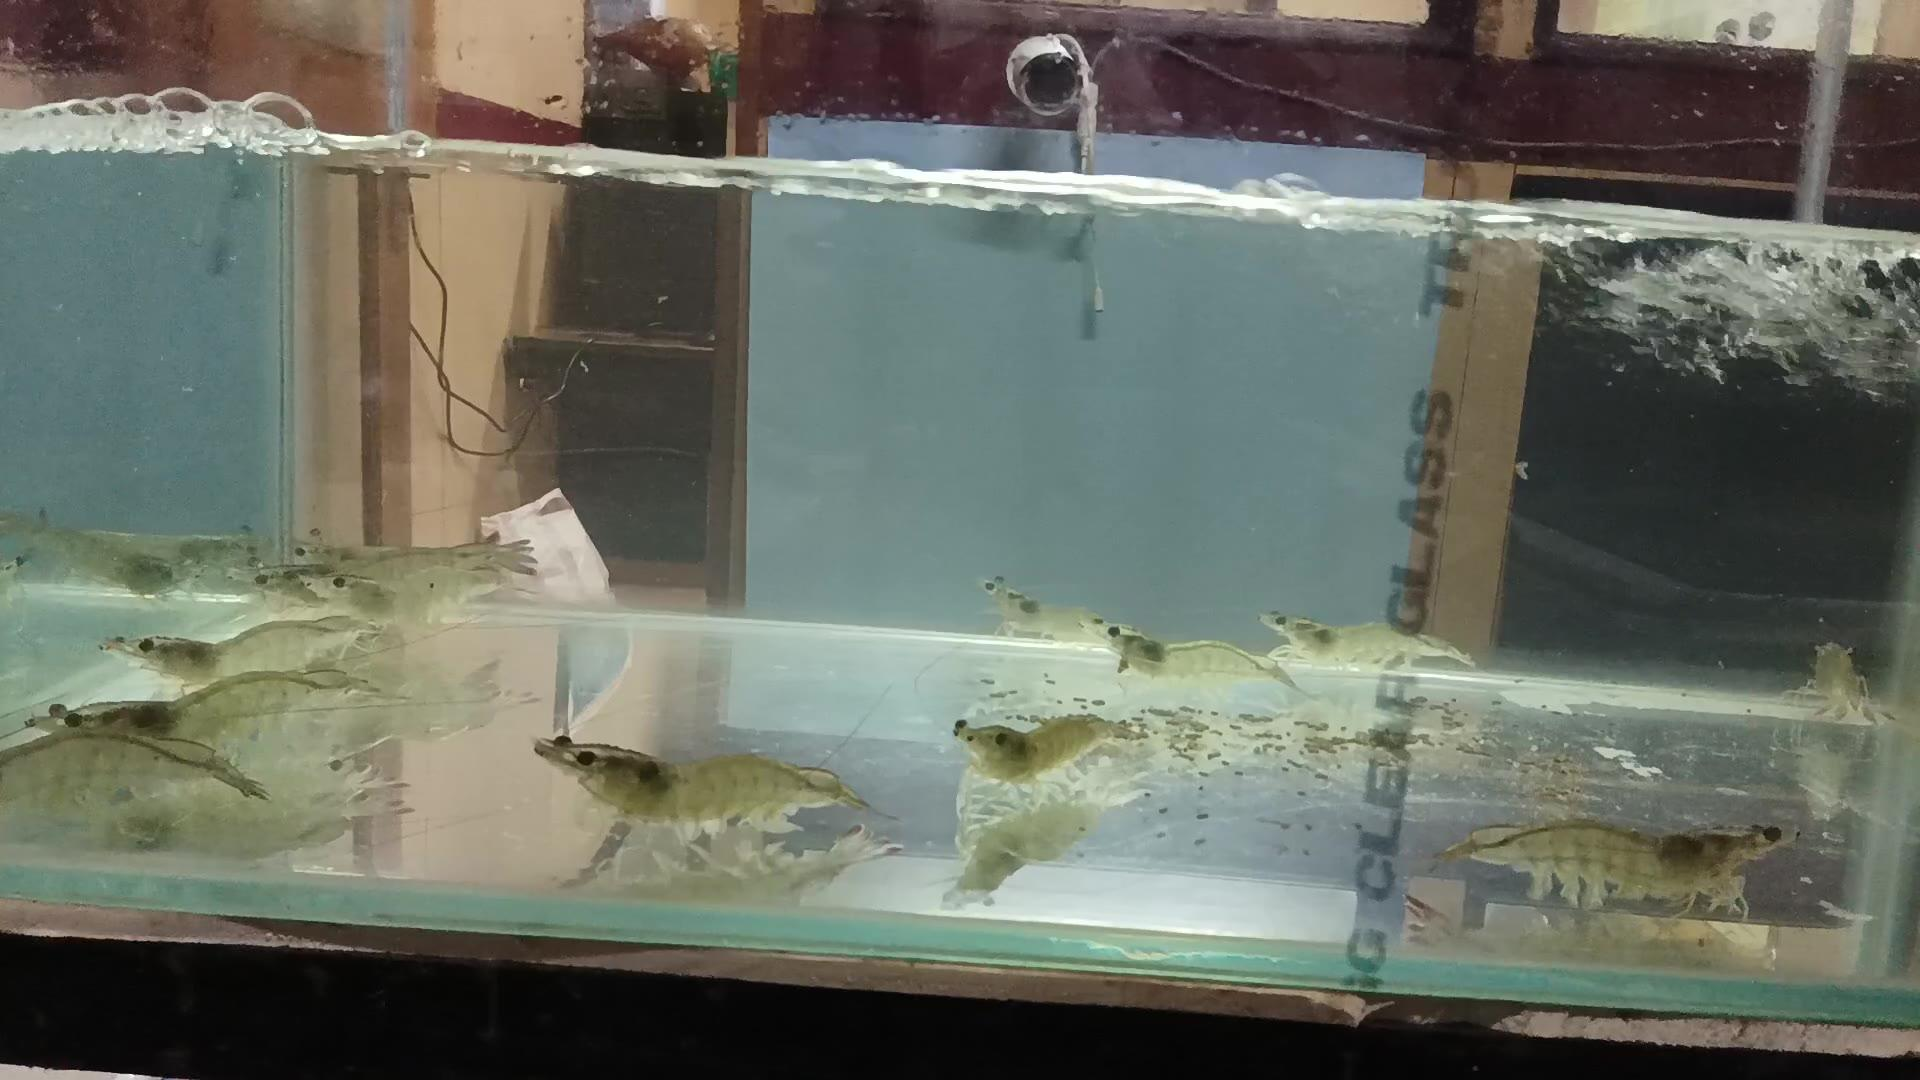

In [12]:
image_path = '/content/gdrive/MyDrive/data/test/images/ezgif-frame-003_jpg.rf.9ea956747eb6b3cdb2b4e3d044181396.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)

In [13]:
height, width, channels = image.shape
print(f'Height: {height} \n Width: {width}')

Height: 1080 
 Width: 1920



0: 384x640 8 shrimpss, 404.9ms
Speed: 21.6ms preprocess, 404.9ms inference, 31.2ms postprocess per image at shape (1, 3, 384, 640)


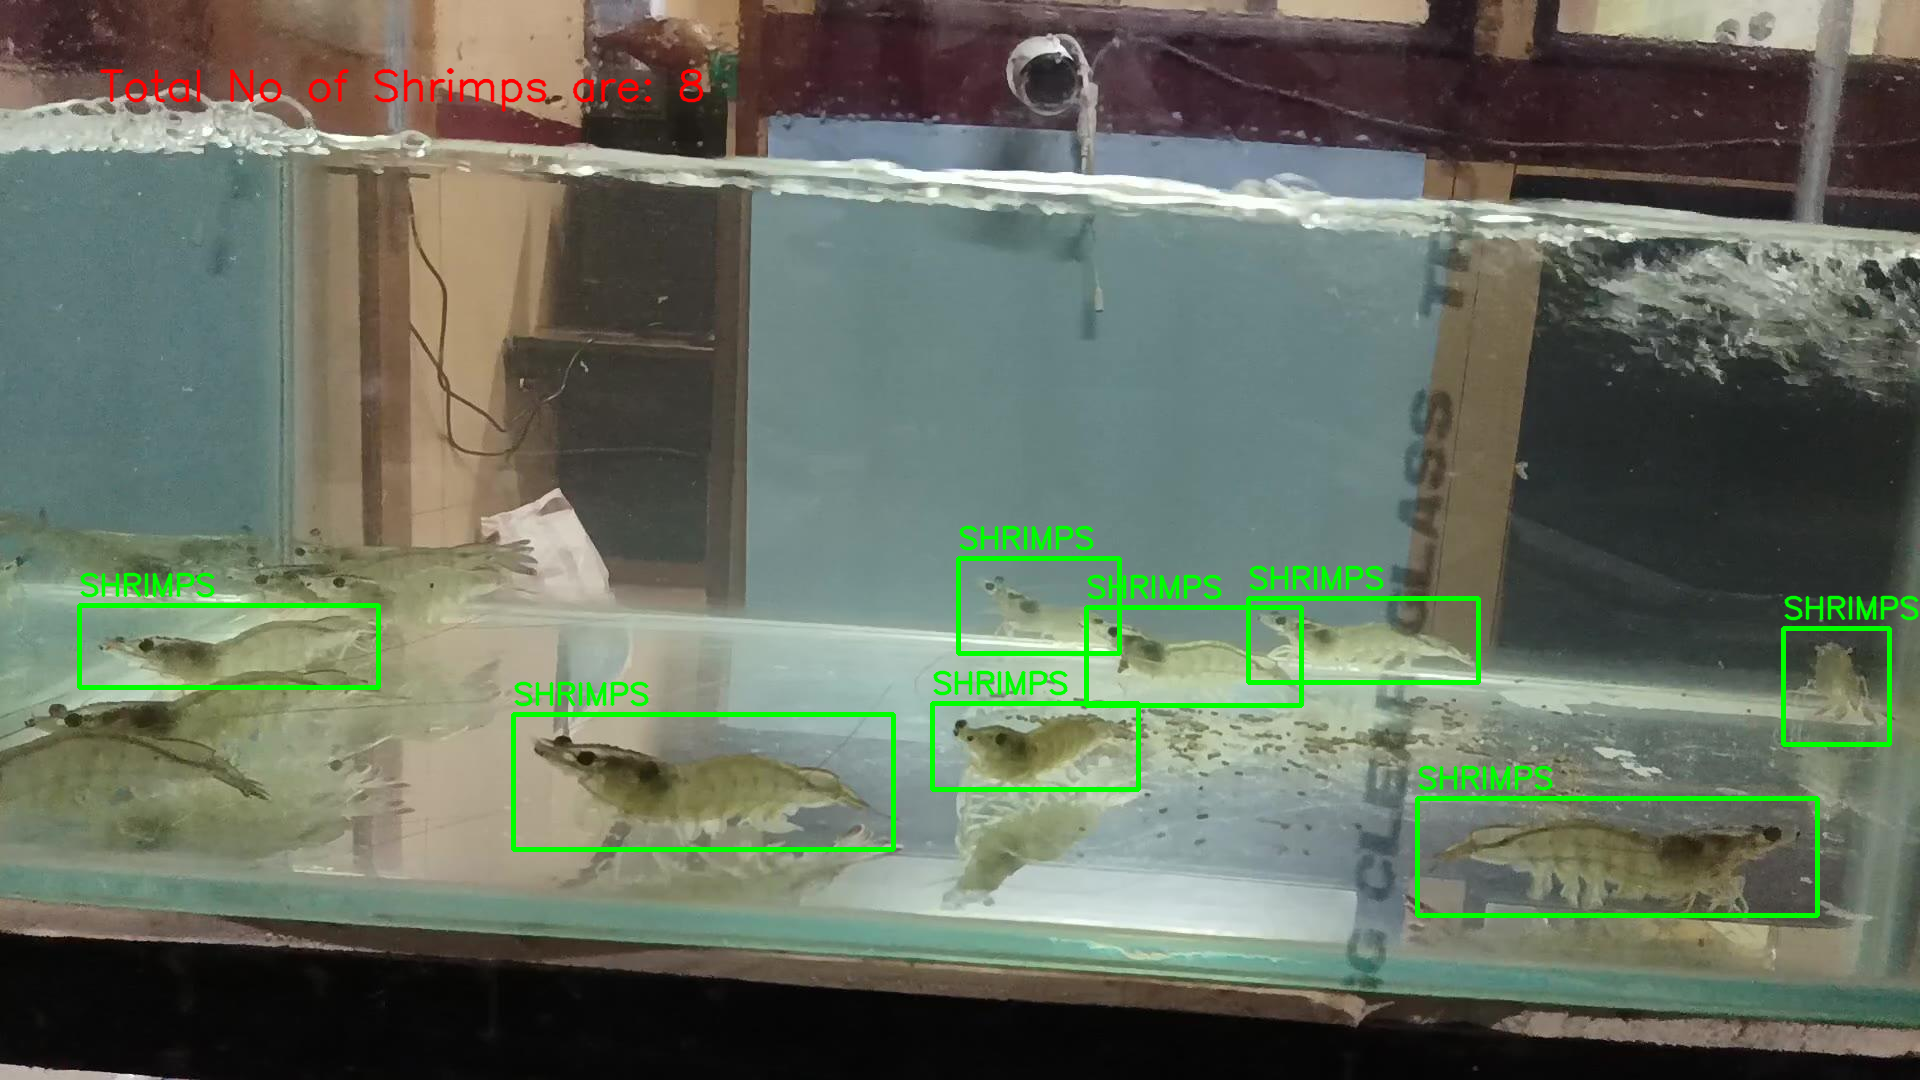

Total Shrimps are: 8


In [14]:
image_predict = image.copy()
height, width, channels = image.shape

results = model(image)[0]

threshold = 0.2
count = 0
for result in results.boxes.data.tolist():
  x1, y1, x2, y2, score, class_id = result

  if score > threshold:

      cv2.rectangle(image_predict, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
      cv2.putText(image_predict, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

      count = count + 1

cv2.putText(image_predict, "Total No of Shrimps are: " + str(count), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(image_predict)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Total Shrimps are:", count)

In [ ]:
import pandas as pd
pd.DataFrame(results.boxes.data.tolist())

In [ ]:
image.shape